In [ ]:
!pip install geopandas
!pip install mapclassify

In [ ]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify
from pandas_datareader import wb

In [ ]:
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [ ]:
map.rename(columns={'name': 'country'},  inplace=True)
map['country']
map.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
map = map[(map.pop_est>0) & (map.continent!="Antarctica")]

In [ ]:
data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2021, end=2021)
data.head()

,,FP.CPI.TOTL.ZG
country,year,
Africa Eastern and Southern,2021,7.240978
Africa Western and Central,2021,3.925603
Arab World,2021,3.243460
Caribbean small states,2021,2.236850
Central Europe and the Baltics,2021,3.839845


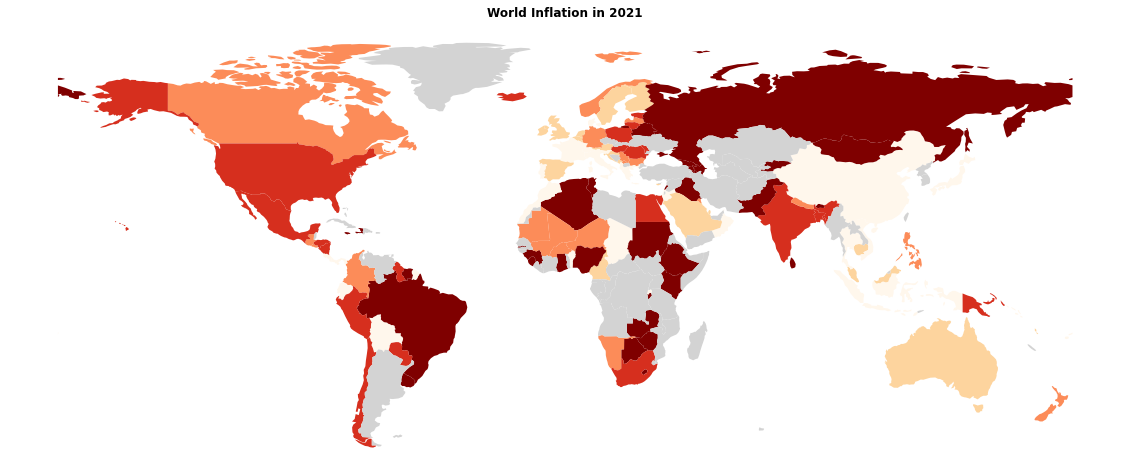

In [ ]:
map = map.set_index('country')
map = map.rename(index=index_change)

data = data.reset_index(1)
data.columns = ['year','inflation']

map = map.join(data, how='outer')
x = map.plot('inflation', cmap='OrRd', scheme='quantiles', missing_kwds={"color": "lightgrey"}, figsize=(20,15))
x.set_axis_off();

plt.title("World Inflation in 2021", fontweight='bold')
plt.show()